Sequence Visualization

In [ ]:
%load_ext autoreload
%autoreload 2
import utils as U
from torch.utils.data import DataLoader
import torchvision
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = DeepFakeClassifierDataset(crops_dir='crops', data_path='../datasets/dfdc', hardcore=True, normalize=None, folds_csv='../datasets/dfdc/folds.csv', fold = 1, transforms=DAT.create_train_transforms(300))
dataset.reset(2,1)

NameError: name 'DeepFakeClassifierDataset' is not defined

In [198]:
loader = DataLoader(dataset, batch_size=4, num_workers=1, shuffle=sampler is None, sampler=sampler, pin_memory=False, drop_last=True)

NameError: name 'dataset' is not defined

[[ 1  1  1 ...  4  4  4]
 [ 1  1  1 ...  4  4  4]
 [ 1  1  1 ...  4  4  4]
 ...
 [11 12 12 ...  5  5  6]
 [ 8  8  8 ...  4  5  4]
 [ 7  7  6 ...  4  4  4]] 254 0
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


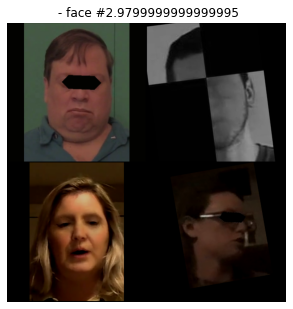

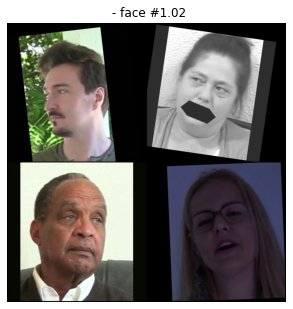

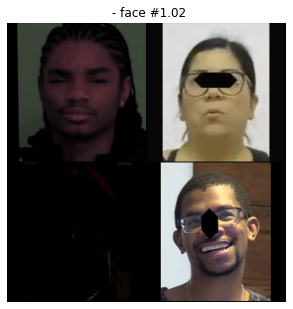

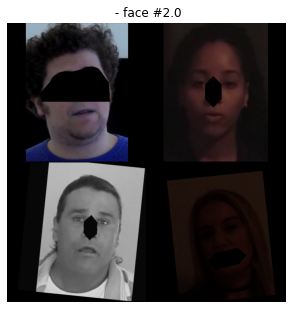

In [42]:
for i, (data) in enumerate(loader):
    grid = torchvision.utils.make_grid(data["image"], nrow=2)
    fig, ax = plt.subplots(1,1, figsize=(5,7))
    ax.imshow(np.transpose(grid.numpy(), (1,2,0)))
    ax.set_title(f' - face #{data["labels"].sum()}')
    ax.axis('off')
    plt.show()
    if i > 2:
        break

## TUM Dataset

In [1]:
%load_ext autoreload
%autoreload 2
from datasets.ff_dataset import get_loader, read_dataset, CompositeDataset
from utils import read_training_dataset, create_train_transforms
from torch.utils.data import DataLoader
import torch
from torch.utils.data import DataLoader
import torchvision
import matplotlib.pyplot as plt
import numpy as np

In [27]:
filter_ = lambda x: ('original' in x or 'neural' in x) and 'raw' in x
train, _, _ =  read_training_dataset('../datasets/mtcnn',
                                        create_train_transforms(
                                            220, option='cutout_da', shift_limit=.01, scale_limit=.05, rotate_limit=5,
                                        ), max_videos = 10, max_images_per_video=5, normalization=None)

Using training data: 
neural_textures_faces_c23
neural_textures_faces_c40
neural_textures_faces_raw
original_faces_c23
original_faces_c40
original_faces_raw


In [28]:
sampler = None
loader = DataLoader(train, batch_size=4, num_workers=1, shuffle=sampler is None, sampler=sampler, pin_memory=False, drop_last=True)

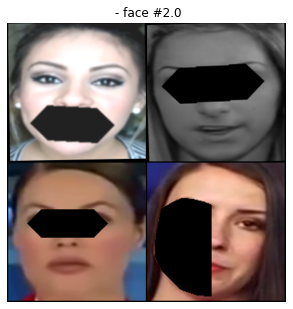

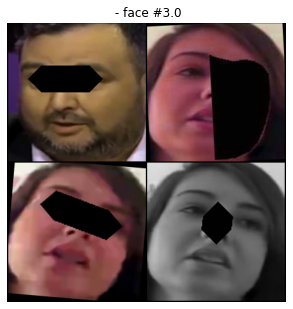

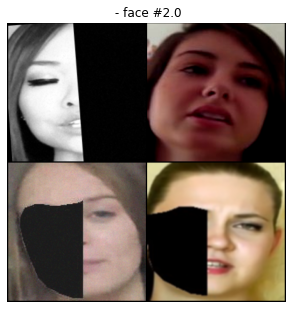

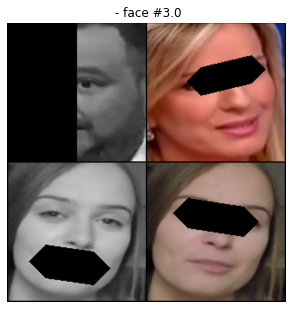

In [29]:
for i, (data) in enumerate(loader):
    grid = torchvision.utils.make_grid(data[-2], nrow=2)
    fig, ax = plt.subplots(1,1, figsize=(5,7))
    ax.imshow(np.transpose(grid.numpy(), (1,2,0)))
    ax.set_title(f' - face #{data[-1].sum()}')
    ax.axis('off')
    plt.show()
    if i > 2:
        break

### Test